In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import numpy as np

from sklearn.cluster import KMeans

# Example make blobs

In [2]:
# Toy data sets
centers = [(5, 0), (10, 0), (15, 0)]

X, y   = datasets.make_blobs(n_samples = 50,
                                        centers     = centers,
                                        cluster_std = 2,
                                        random_state= 2)

In [3]:
X[:4]

array([[11.22268156,  0.09594118],
       [ 9.16136704, -0.2646578 ],
       [11.52408099,  2.08164791],
       [ 9.68110109, -0.18290525]])

In [4]:
y

array([1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0,
       2, 0, 0, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1,
       1, 2, 2, 0, 2, 1])

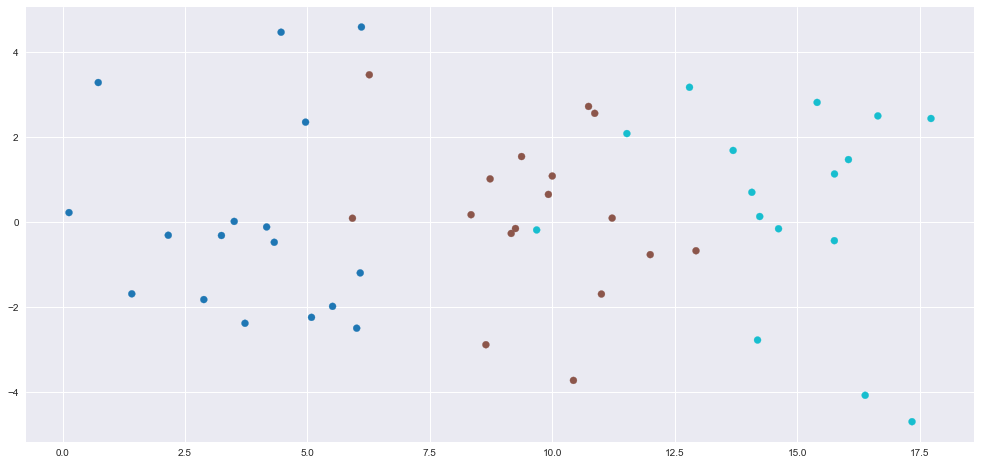

In [5]:
# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.scatter(X[:,0], 
            X[:,1], 
            c=y, 
            cmap=cmap)

In [7]:
# Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5)]

x_neat, y_neat   = datasets.make_blobs(n_samples   = 5000,
                                        centers     = centers_neat,
                                        cluster_std = 2,
                                        random_state= 2)

x_messy, y_messy = datasets.make_classification(n_samples=5000,
                                          n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          shuffle=False,
                                          random_state=301)


In [8]:
x_neat[:5]

array([[-7.70580012, 10.19111397],
       [-0.42283988, -8.60268319],
       [11.61232091,  1.99648944],
       [ 2.30591836, -4.24868234],
       [ 8.96381683,  1.86207667]])

In [9]:
x_messy[:5]

array([[ 1.65858929, -1.66391905, -0.80267149, -0.21287538, -0.48367462,
         0.14934787,  0.9014843 ,  1.04933293, -0.81190502,  0.27640997],
       [ 0.71660657, -1.8512412 , -1.36678807, -0.80089967,  0.03181092,
         1.03689666,  0.01725968, -0.79798812, -0.30385884, -0.38893579],
       [ 2.04750943, -1.19971274, -0.22127946,  0.27211177,  0.92826237,
        -0.11557534,  0.84604411,  0.94565732, -1.98394515, -0.31239942],
       [ 1.82876005, -1.18893383, -0.30338594,  0.16954236, -0.66477759,
         1.57697067,  1.08806114,  0.58041643, -0.65597736, -0.68173376],
       [ 1.59074493, -1.42387486, -0.61491968, -0.09649414,  0.04500792,
         0.86127767, -0.59388163,  1.40468302, -0.50424893,  0.39456361]])

In [7]:
np.unique(y_neat)

array([0, 1, 2])

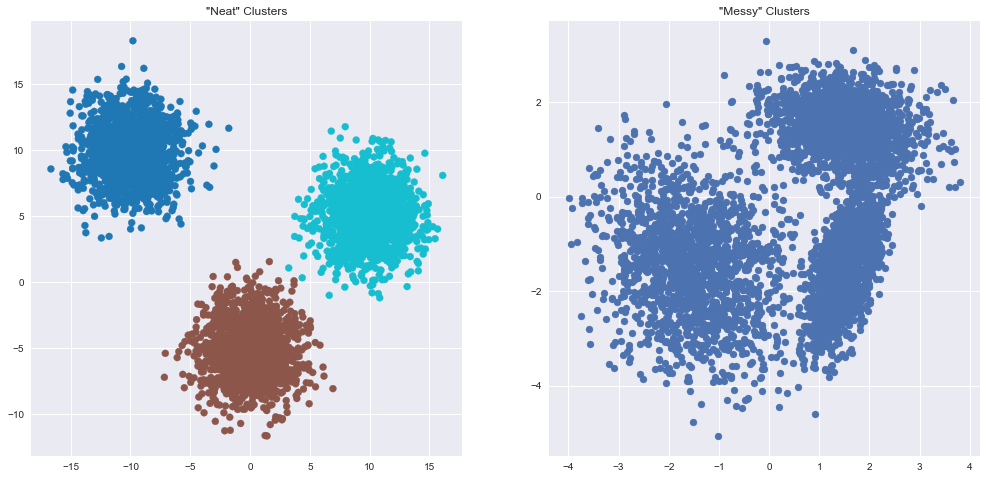

In [10]:
# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], 
            x_neat[:,1], 
            c=y_neat, 
            cmap=cmap)

plt.subplot(122, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], 
            x_messy[:,1]);

#### The data set on the left seems to clearly exhibit 3 well-defined, spherical clusters while the set on the right is hazy. Is it 2 clusters? Maybe 3? 

In [16]:
# Predict K-Means cluster membership
km_neat   = KMeans(n_clusters=4, max_iter=500, random_state=100)
km_messy  = KMeans(n_clusters=4, max_iter=500, random_state=100)

y_neat  = km_neat.fit_predict(x_neat)
y_messy = km_messy.fit_predict(x_messy)


In [17]:
km_neat.cluster_centers_

array([[-0.06305963, -6.72639019],
       [-9.92334987,  9.85390517],
       [ 9.91445988,  5.06593149],
       [ 0.05549363, -3.50224648]])

In [18]:
km_messy.cluster_centers_

array([[ 1.5000422 ,  1.42323952,  1.91164742,  1.6406865 , -0.01679079,
         0.00803367,  0.03752593,  0.0228677 , -0.04384658,  0.01029968],
       [ 1.43939705, -1.55091858, -0.7928842 , -0.2516677 , -0.0650982 ,
         0.00698723,  0.01394905, -0.03960639,  0.01731428,  0.04120646],
       [-1.38592726, -2.45882654, -2.79659105, -2.23201431,  0.10544526,
         0.06070391, -0.03244028, -0.04696261,  0.0204566 , -0.06035898],
       [-1.66586499, -0.63189027, -1.26841291, -1.22811044, -0.07985296,
        -0.00987156, -0.05647816,  0.02435896,  0.00560965,  0.10003854]])

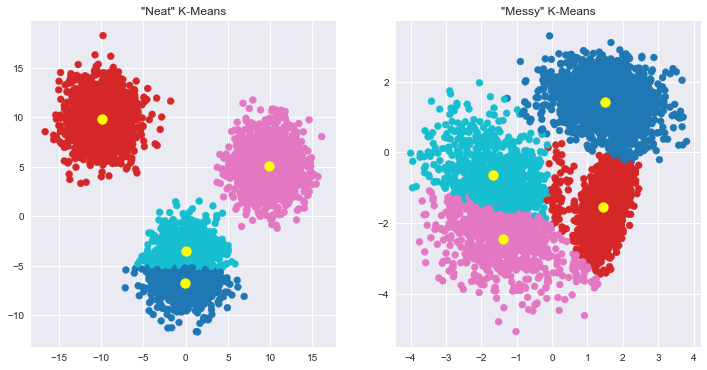

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(121, title='"Neat" K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=y_neat, cmap=cmap)

plt.scatter(km_neat.cluster_centers_[:, 0], 
            km_neat.cluster_centers_[:, 1], 
            s = 100, 
            c = 'yellow', 
            label = 'Centroids')

plt.subplot(122, title='"Messy" K-Means')
plt.scatter(x_messy[:,0], x_messy[:,1], c=y_messy, cmap=cmap)

plt.scatter(km_messy.cluster_centers_[:, 0], 
            km_messy.cluster_centers_[:, 1], 
            s = 100, 
            c = 'yellow', 
            label = 'Centroids')


__performance on the __
- __"neat"__ data__ set achieves excellent clustering, 
- __"messy"__ data set — while not that bad — is suboptimal. 

- Visually, we can see 2, maybe 3, clusters — but K-means creates partitions that don't particularly reflect that. 

- Our clusters are of varying shapes and variances, which proves challenging for K-means to work with.

- "neat" clusters are composed of data points that are normally distributed and isotropic (i.e., the same variance in all directions) across the 2 D of the plot. 

- "messy" data is normally distributed as well, but not isotropic 
- "anisotropic" 
- Furthermore, the "messy" clusters aren't well separated, so K-means has a hard time judging which centroid each data point is closest to.

#### both data sets are artificially created, which one is more likely real?